In [1]:
## importing libraries
## data manipulation
import pandas as pd
import numpy as np
import re
import string
%matplotlib inline

# methods and stopwords - text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
## creating stopwords set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
## Loading the dataset

elon_tweets  = pd.read_csv("Elon_musk.csv",index_col=0)
elon_tweets.head()


,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [8]:
# Removing uppercase chars
elon_tweets = elon_tweets['Text'].str.lower()
elon_tweets

1                                  @kunalb11 i’m an alien
2       @id_aa_carmack ray tracing on cyberpunk with h...
3                     @joerogan @spotify great interview!
4                         @gtera27 doge is underestimated
5       @teslacn congratulations tesla china for amazi...
                              ...                        
1995    @flcnhvy true, it sounds so surreal, but the n...
1996    @ppathole make sure to read ur terms &amp; con...
1997                  @teslagong @ppathole samwise gamgee
1998    @ppathole altho dumb and dumber is <u+0001f525...
1999                            progress update august 28
Name: Text, Length: 1999, dtype: object

In [10]:
elon_tweets = ' '.join(elon_tweets)
elon_tweets

'@kunalb11 i’m an alien @id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it? @joerogan @spotify great interview! @gtera27 doge is underestimated @teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!! happy new year of the ox! https://t.co/9wfkmyu2oj frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm @owensparks_ @flcnhvy @anonyx10 haha thanks :) @flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation. the most entertaining outcome is the most likely @givedirectly just sent some just agree to do clubhouse with @kanyewest https://t.co/3rwe9uhsts @geoffkeighley @unrealengine it’s getting real bought some dogecoin for lil x, so he can be a toddler hodler @joshmanmode he definitely has issues, but the sentencing seems a bit high @freewalletorg thanks for fixing @freewalletorg please unlock my account @astrojordy <u+0001f923><u+0001f

In [11]:
#Punctuation
no_punc_tweets = elon_tweets.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_tweets

'kunalb11 i’m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera27 doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco9wfkmyu2oj frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks  flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine it’s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u0001f923u0001f923 this is true power haha httpstcofc9uhqsd7o freewalletorg

In [12]:
#Tokenization

from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_tweets)
print(text_tokens[0:50])

['kunalb11', 'i', '’', 'm', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox']


In [13]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tweets = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tweets[0:40])

['kunalb11', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


[nltk_data] Downloading package punkt to /Users/halders/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in no_stop_tweets]
print(stemmed_tokens[0:40])

['kunalb11', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi']


In [16]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load("en_core_web_sm")
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tweets))
print(doc[0:40])

kunalb11 ’ alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox httpstco9wfkmyu2oj frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])
lemma_output  = ' '.join(lemmas)

['kunalb11', "'", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year']


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb11': 2672, 'alien': 227, 'idaacarmack': 2414, 'ray': 3559, 'tracing': 4411, 'cyberpunk': 946, 'hdr': 1655, 'nextlevel': 3110, 'try': 4445, 'joerogan': 2592, 'spotify': 4046, 'great': 1592, 'interview': 2523, 'gtera27': 1610, 'doge': 1097, 'underestimate': 4575, 'teslacn': 4266, 'congratulation': 842, 'tesla': 4260, 'china': 727, 'amazing': 252, 'execution': 1307, 'last': 2690, 'year': 4835, 'next': 3109, 'even': 1278, 'happy': 1638, 'new': 3106, 'ox': 3258, 'httpstco9wfkmyu2oj': 1841, 'frodo': 1474, 'underdoge': 4574, 'thought': 4338, 'would': 4811, 'fail': 1344, 'httpstcozgxjfdzzrm': 2374, 'owenspark': 3255, 'flcnhvy': 1416, 'anonyx10': 280, 'haha': 1624, 'thank': 4302, 'indeed': 2462, 'tweet': 4464, 'definitely': 1001, 'represent': 3643, 'realworld': 3584, 'time': 4355, 'allocation': 231, 'entertaining': 1235, 'outcome': 3236, 'likely': 2749, 'givedirectly': 1561, 'send': 3824, 'agree': 198, 'clubhouse': 768, 'kanyew': 2627, 'httpstco3rwe9uhst': 1779, 'geoffkeighley': 1539, '

### Feauture extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb11': 2672, 'alien': 227, 'idaacarmack': 2414, 'ray': 3559, 'tracing': 4411, 'cyberpunk': 946, 'hdr': 1655, 'nextlevel': 3110, 'try': 4445, 'joerogan': 2592, 'spotify': 4046, 'great': 1592, 'interview': 2523, 'gtera27': 1610, 'doge': 1097, 'underestimate': 4575, 'teslacn': 4266, 'congratulation': 842, 'tesla': 4260, 'china': 727, 'amazing': 252, 'execution': 1307, 'last': 2690, 'year': 4835, 'next': 3109, 'even': 1278, 'happy': 1638, 'new': 3106, 'ox': 3258, 'httpstco9wfkmyu2oj': 1841, 'frodo': 1474, 'underdoge': 4574, 'thought': 4338, 'would': 4811, 'fail': 1344, 'httpstcozgxjfdzzrm': 2374, 'owenspark': 3255, 'flcnhvy': 1416, 'anonyx10': 280, 'haha': 1624, 'thank': 4302, 'indeed': 2462, 'tweet': 4464, 'definitely': 1001, 'represent': 3643, 'realworld': 3584, 'time': 4355, 'allocation': 231, 'entertaining': 1235, 'outcome': 3236, 'likely': 2749, 'givedirectly': 1561, 'send': 3824, 'agree': 198, 'clubhouse': 768, 'kanyew': 2627, 'httpstco3rwe9uhst': 1779, 'geoffkeighley': 1539, '

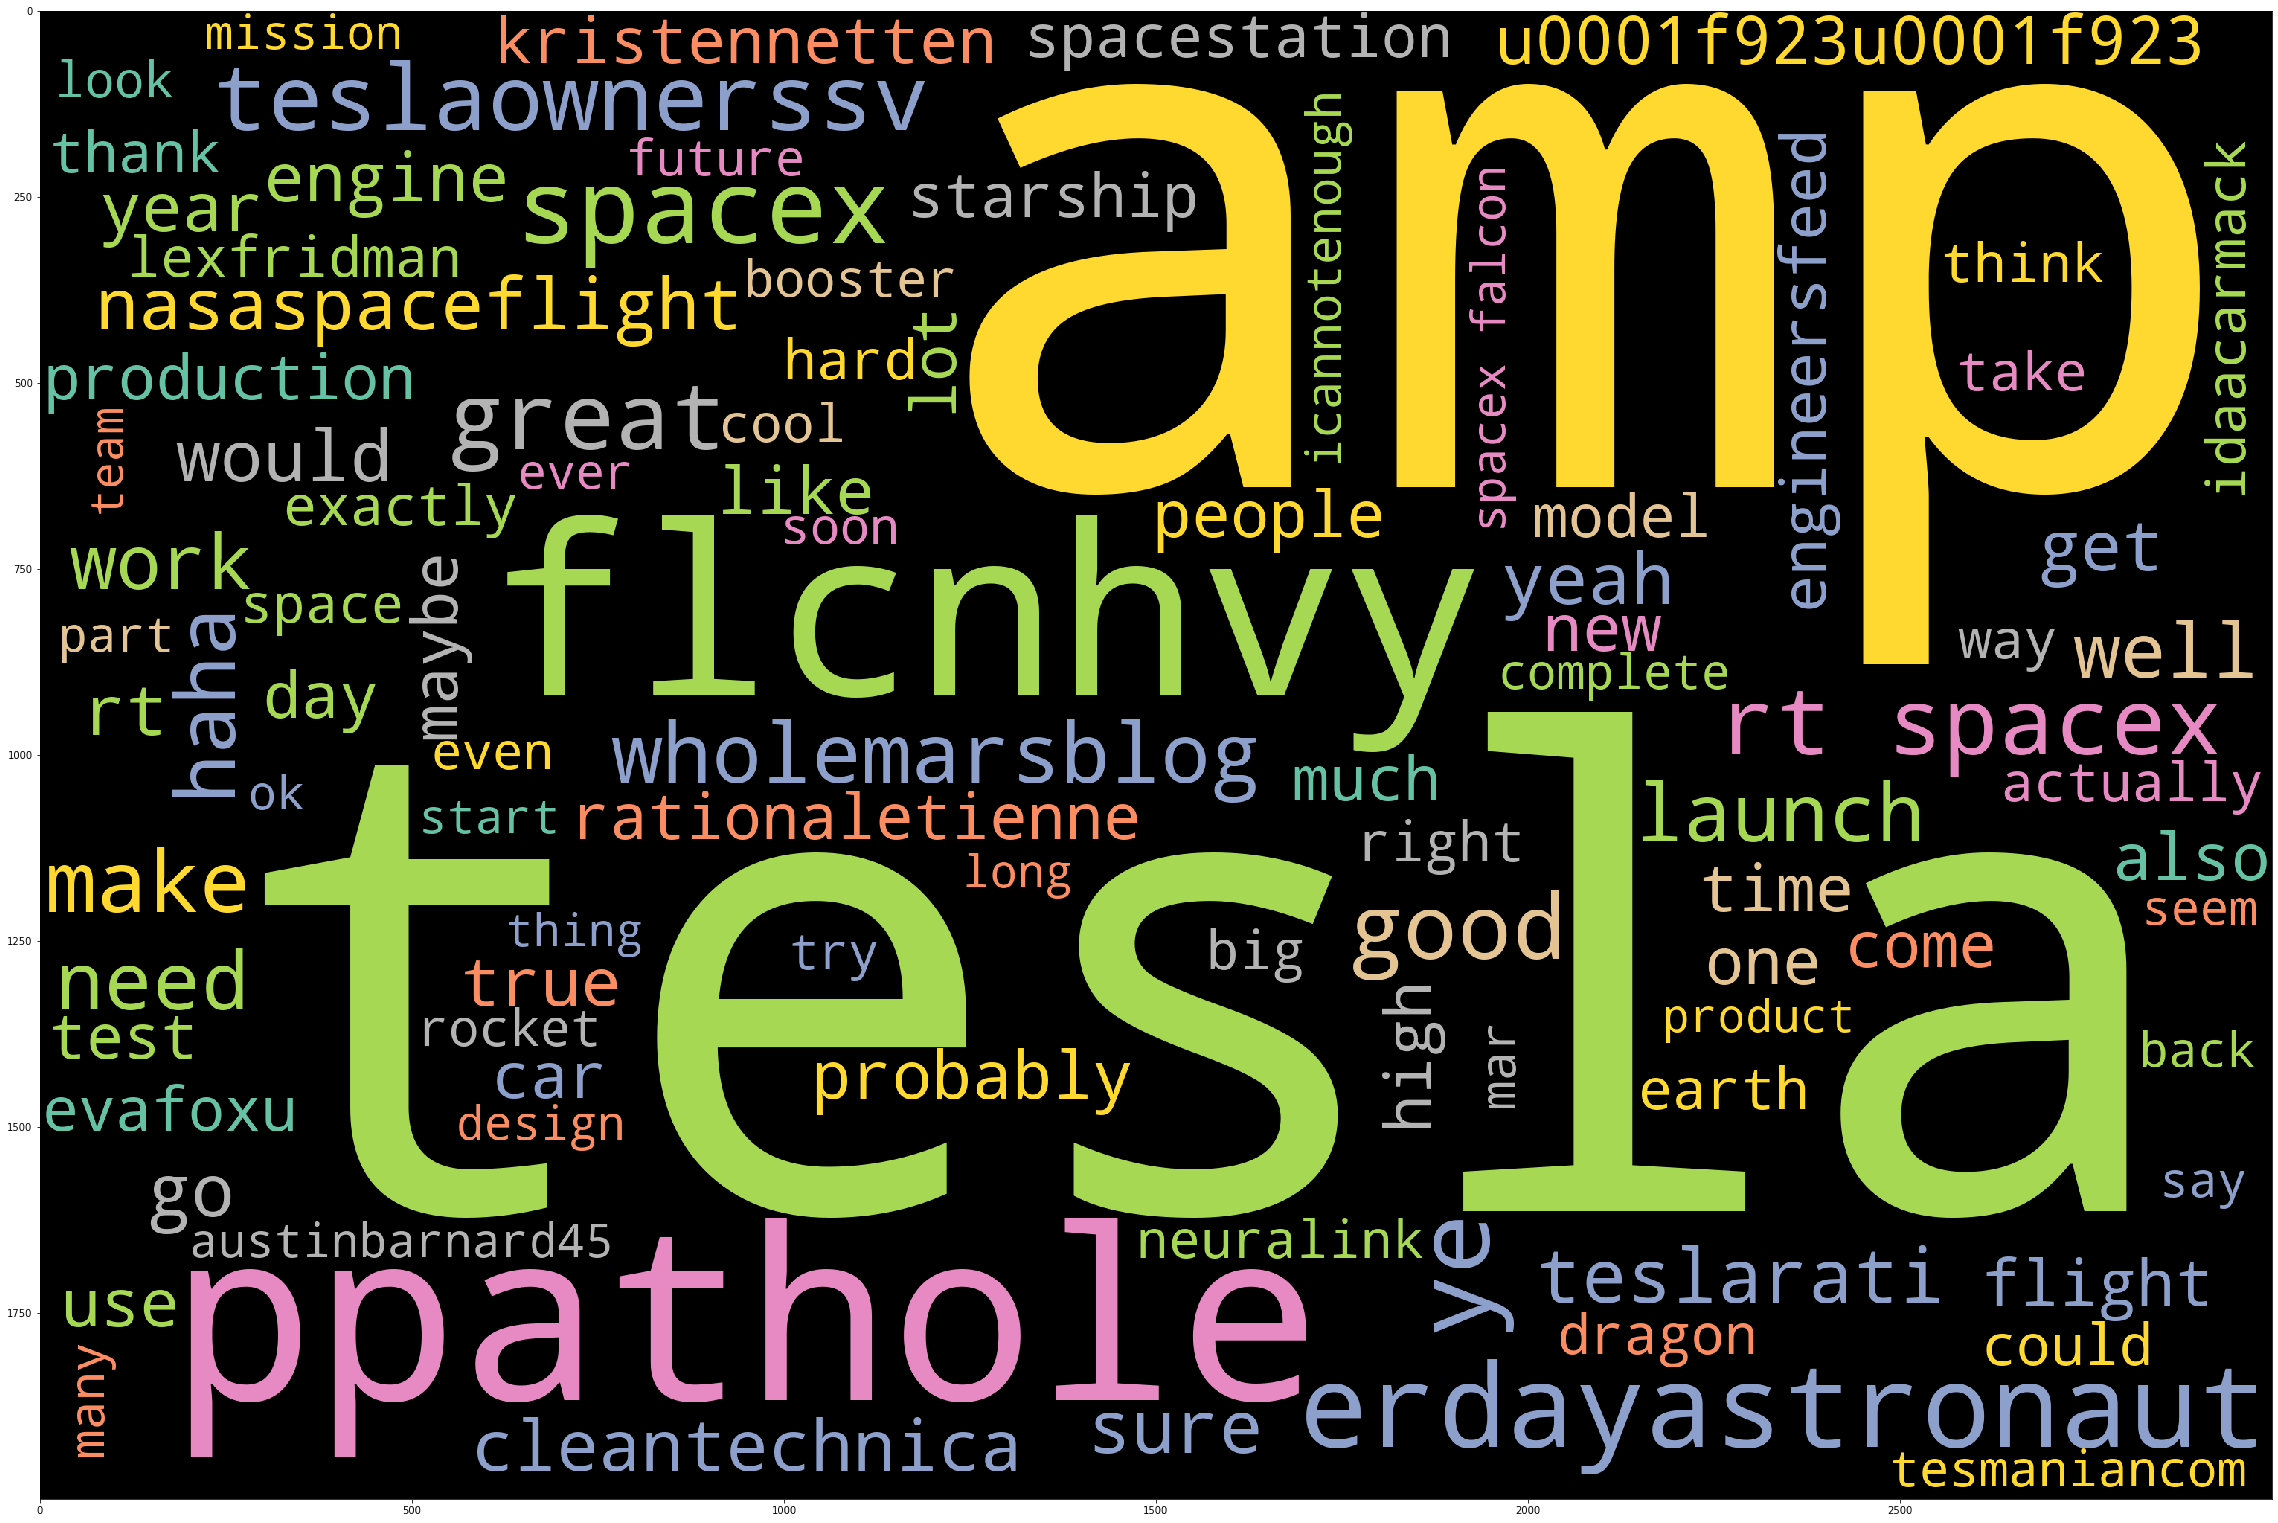

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop_words).generate(lemma_output)
# Plot
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)